1\. Write a function that converts number representation (bin<->dec<->hex)

In [ ]:
hex_d = {'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15}
hex_d_inv = {10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F'}

def convert(n, in_base, out_base):
    if in_base == 10:
        c_str = ''
        while n > 0:
            c_temp = n%out_base
            if c_temp in hex_d_inv:
                c_temp = hex_d_inv[c_temp]
            c_str += str(c_temp)
            n = n//out_base
        c_str = c_str[::-1]
        return c_str
    else:
        c_num = 0
        n_str = str(n)
        n_str = n_str[::-1]
        exp = 0
        for digit in n_str:
            if digit in hex_d:
                digit = hex_d[digit]
            c_num += (int(digit))*in_base**exp
            exp +=1
        return c_num
    
a = convert(107252, 10, 16)
print(a)

2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [ ]:
def convertToFloat(binary):
    offset = lambda x : x + 2
    sign = int(binary[offset(0)])
    exponent = int(binary[offset(1):offset(9)],2)
    mantissa = binary[offset(9):]
    mantissa = sum([1]+[int(i)*2**(-(index+1)) for index, i in enumerate(mantissa)])
    value = mantissa*2**(exponent-127)
    if sign:
        return -value
    return value
        
binary = '0b01000001010000000000000000000000'
convertToFloat(binary)

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [ ]:
u = 1
o = 1

u_check = True
o_check = True

while u_check or o_check:
    if u_check:
        u_tmp = u
        u = u/2
        if u >= u_tmp:
            u_check = False
        
    
    if o_check:
        o_tmp = o
        o = o*2
        if o <= o_tmp:
            o_check = False
            
print("u:",u)
print("o:",o)

4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [ ]:
num = 1
off = 1
i = 1
num_check = True

while num_check:
    print("#ITERATION", i, "#")
    print("Number:", num)
    num_temp = num
    num += off
    print("New number:", num)
    if num_temp == num:
        num_check = False
    off = off*10**-i
    i+=1

5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [7]:
a = 0.001
b = 1000
c = 0.001

import math
def solveEquation2Order(a, b, c):
    delta = b**2 - 4*a*c
    if delta == 0:
        return [(-b)/(2*a)]
    else:
        return [(-b + math.sqrt(delta))/(2*a), (-b - math.sqrt(delta))/(2*a)]

print(solveEquation2Order(a, b, c))

def solveEquation2Order_2(a, b, c):
    delta = b**2 - 4*a*c
    if delta == 0:
        return [(-b)/(2*a)]/(-b)
    else:
        return [((-b + math.sqrt(delta))/(2*a) * (-b - math.sqrt(delta))) / (-b - math.sqrt(delta)),
                ((-b - math.sqrt(delta))/(2*a) * (-b + math.sqrt(delta))) / (-b + math.sqrt(delta))]
    
print(solveEquation2Order_2(a, b, c))

import cmath
def solve_quad(a,b,c):
    (x1,x2) = solveEquation2Order(a,b,c)
    return(cmath.sqrt(x1), -cmath.sqrt(x1),cmath.sqrt(x2),-cmath.sqrt(x2))

print(solve_quad(0.001,1000,0.001))

[-9.999894245993346e-07, -999999.999999]
[-9.999894245993346e-07, -999999.9999989999]
(0.0009999947122856874j, (-0-0.0009999947122856874j), 999.9999999995j, (-0-999.9999999995j))


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

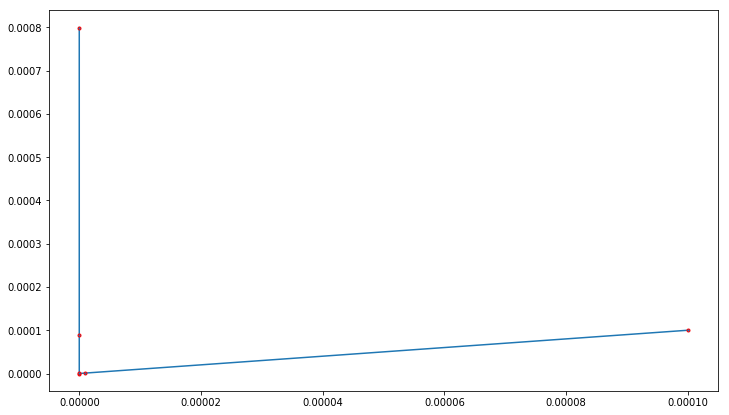

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

function = lambda x : x * (x - 1)
calc_derivative = lambda func, x, delta: (func(x+delta)-func(x))/delta
derivative = lambda x : 2 * x - 1

deltas = [10**(-2*i) for i in range(1,8)]

results = list(map(lambda x: calc_derivative(function, 1, x), deltas))
true_derivative = derivative(1)
errors = [abs(i-true_derivative) for i in results]

plt.figure(figsize=(12,7))
plt.plot(deltas[1:],errors[1:], ls = '-', marker = '.', mec = 'r')
plt.show()

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 
